# SVM implimentation using PEGASOS - Primal Estimate Sub-Gradient Solver OF SVM

In [15]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import numpy as np

In [12]:
X,Y = make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0) 
# Since binary classification so n_features=2,n_informative=2

In [36]:
print(Y)

[0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1
 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0]


In [38]:
# We have to convert Y that has values in 0 and 1 to 1 and -1
Y[Y==0] =-1 # In Y Wherever we find 0 convert it to -1
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

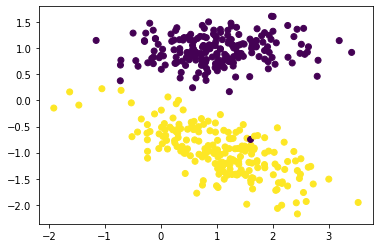

In [13]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [59]:
class SVM:
    def __init__(self,C=1.0):
        self.C=C
        self.W=0
        self.b=0 # bias term
        
    def hinge_loss(self,W,b,X,Y):
        loss = 0.0
        
        loss+= .5*np.dot(W,W.T)
        m=X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C * max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n= learning_rate
        c=self.C
        
        #Initialize the moedl parameter
        W=np.zeros((1,no_of_features))
        bias=0
        #print(self.hinge_loss(W,bias,X,Y))
        
        # Training from here , Weight and bias update rule
        losses = []
        for i in range(maxItr):
            # Training Loop
            l = self.hinge_loss(W,bias,X,Y)
            losses.append(l)
            
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # Batch Gradient Descent with random Shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                # Assume 0 gradient for the batch
                gradw=0
                gradb=0
                
                #Iterate over all exapmles in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    # Should not go out of batch
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                
                # Gradient for the batch is ready to update
                W = W-n*W + n*gradw
                bias = bias + n*gradb
            
        self.W=W
        self.b = bias
        return W,bias,losses

In [51]:
mySVM = SVM()

In [34]:
mySVM.fit(X,Y) # TEsting the train function

[[400.]]


In [40]:
ids = np.arange(100)
np.random.shuffle(ids)
print(ids)

[98 58 93 45  7 72 55 31 14 18 66 74 90 83  8 40 60  3 38 27 41 56 48 49
 70 94 69 20 95 43 80 32 77 39 63  5 37  6  2 81 71 26 64 51 23 21 61 42
 62 16 54 36 33 68 59 13 73 91 47 84 12 92 17 52 78 89 10 67 86 85 29  0
 34 76 19 53 35 28 25 82  1  4 30 99 24 97 87 57 79 50 15 65 22  9 44 11
 75 96 46 88]


In [66]:
mySvm = SVM()
W,b,losses = mySvm.fit(X,Y,maxItr=100)

In [67]:
print(losses)

[400.0, 250.82323971377858, 120.88854548247413, 69.76911528013683, 52.30056368130784, 44.193504945398445, 39.14833044929209, 35.50852017767489, 32.66463004132104, 30.40996551266127, 28.584291895979227, 27.004855538239784, 25.736118212004474, 24.635283801034245, 23.698671099502185, 22.903897486089328, 22.22931228185002, 21.73769827566799, 21.297114645043507, 20.925225085320946, 20.563670305580267, 20.26376566989275, 20.005034772342025, 19.779098428058056, 19.562821908775856, 19.34738788240696, 19.13289161420314, 18.919130942099727, 18.7465484306159, 18.587092566819383, 18.42694886240448, 18.269777114027235, 18.136755344389403, 18.01112593942451, 17.886902721671735, 17.759454643787365, 17.63811564831508, 17.51418893639105, 17.396881425414424, 17.295118478463223, 17.204365220178175, 17.112765080864015, 17.027088052635452, 16.961043280238613, 16.891954831626126, 16.83649882076734, 16.776751964000315, 16.709293331098486, 16.650088819979104, 16.59117410076395, 16.532479335501666, 16.47404897

400.0   14.951568205204273


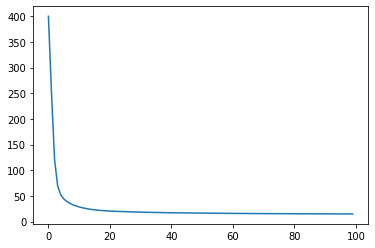

In [70]:
print(losses[0]," ",losses[99])
plt.plot(losses)
plt.show()

In [71]:
W,b = mySvm.W,mySvm.b
print(W,b)

[[-0.32369367 -2.0348765 ]] 0.38600000000000023


In [76]:
def plotHyperplane(w1,w2,b):
    plt
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2 #WT+b=0 , since there are 2 --> w1x1+w2x2+b = 0 is equation of the line
    plt.plot(x_1,x_2)
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()

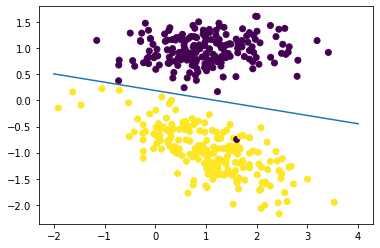

In [77]:
plotHyperplane(W[0,0],W[0,1],b)